In [1]:
import pandas as pd

df=pd.read_csv('Datasets/SVM_Dataset1.csv', index_col=0)
print(df)

         X1        X2  y
0  2.947814  6.626878  1
1  2.530388  7.785050  1
2  3.566991  5.651046  1
3  3.156983  5.467077  1
4  2.582346  4.457777 -1
5  2.155826  6.222343 -1
6  3.273418  3.520687 -1


Activity: Lets build our X_train and Y_train arrays
Complete this activity groups of 3:

Hint: We'll need to use numpy here, as well as the zip function

In [2]:
import numpy as np
X1=df['X1']
X2=df['X2']
X_train=np.array(list(zip(X1,X2)))

In [3]:
print(X_train)

[[2.947814 6.626878]
 [2.530388 7.78505 ]
 [3.566991 5.651046]
 [3.156983 5.467077]
 [2.582346 4.457777]
 [2.155826 6.222343]
 [3.273418 3.520687]]


In [4]:
y_train=df['y'].values

print(y_train)

[ 1  1  1  1 -1 -1 -1]


Activity: Assign color and label to each target class
Complete this activity groups of 3:

Hint: To do this, build two lists whose color/label values match with the values of the y_train array at the corresponding indices.

In [5]:
color_ls = []
# if y == 1, then the value at the same index in color_ls will be 'b'
# otherwise, it will be 'r'
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')

print(color_ls)

['b', 'b', 'b', 'b', 'r', 'r', 'r']


In [6]:
label = []
# if y == 1, then the value at the same index in label will be 'H'
# otherwise, it will be 'NH'
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')

print(label)

['H', 'H', 'H', 'H', 'NH', 'NH', 'NH']


Activity: Create a scatter plot of data with labels
Complete this activity groups of 3:

Hints:

There's some functions in matplotlib.pyplot that will help us here.
How can the enumerate function help us here?

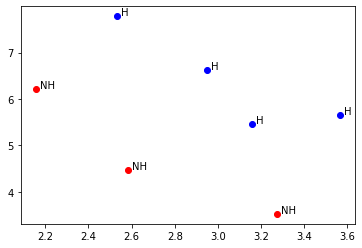

In [7]:
import matplotlib.pyplot as plt

# k is our index, (i,j) are our Serotonin and Dopamine pairings.
# For example, here are the values on the first iteration of the loop:
# k == 0, (i, j) == (2.947814, 6.626878)
for k, (i,j) in enumerate(X_train):
    # add the datapoint to a scatter plot,
    # using the k'th color in colors_ls
    plt.scatter(i, j, c = color_ls[k])
    # 0.02 to the right and above the point,
    # add the k'th text label in label
    plt.text(i+0.02, j+0.02, label[k])

In [8]:
from sklearn import svm

# svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)

# We want to use a linear classification
svm_classifier = svm.SVC(kernel='linear', C=10)
# find the best fit line
svm_classifier.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [9]:
# Helper function to plot the best fit line,
# as well as marking the closest data points to the line,
# through dotted lines (margins)
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

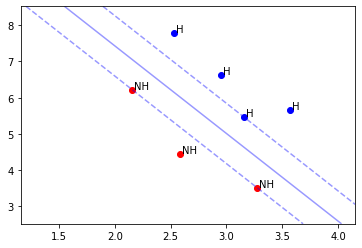

In [10]:
# pass in the trained model and data points,
# and plot the best fit line + margins
plot_decision_boundary(svm_classifier, X_train, y_train)

# plot data points + color/labels
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

# Activity: Obtain the best curve for the following dataset¶
- Create a scatter plot of features with labels for SVM_Dataset2.csv dataset
- Can we find a line that seperate two classes (two lables)?
- Use svm_classifier = svm.SVC(kernel='poly',C=1, degree=2) and fit it with the features and the labels
- Use plot_decision_boundary helper function and plot the best curve for this dataset

In [11]:
df=pd.read_csv('Datasets/SVM_Dataset2.csv')
print(df)

      x1  x2  y
0    7.0  20 -1
1    8.0  12 -1
2    9.0  19 -1
3   10.0  17 -1
4   11.0  15 -1
5   13.0  14 -1
6   14.0  12 -1
7   15.0  14 -1
8   15.0  17 -1
9   16.0  16 -1
10   4.0  15  1
11   5.5  12  1
12   7.0  10  1
13   8.0  10  1
14   9.0   9  1
15  10.0   8  1
16  11.0   5  1
17  12.0   7  1
18  12.0   9  1
19  13.0  10  1


[[ 7.  20. ]
 [ 8.  12. ]
 [ 9.  19. ]
 [10.  17. ]
 [11.  15. ]
 [13.  14. ]
 [14.  12. ]
 [15.  14. ]
 [15.  17. ]
 [16.  16. ]
 [ 4.  15. ]
 [ 5.5 12. ]
 [ 7.  10. ]
 [ 8.  10. ]
 [ 9.   9. ]
 [10.   8. ]
 [11.   5. ]
 [12.   7. ]
 [12.   9. ]
 [13.  10. ]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]
['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
['NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'NH', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']


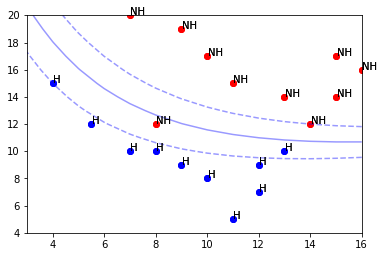

In [25]:
X1=df['x1']
X2=df['x2']
X_train2=np.array(list(zip(X1,X2)))
y_train2=df['y'].values

print(X_train2)
print(y_train2)

color_ls2 = []
# if y == 1, then the value at the same index in color_ls will be 'b'
# otherwise, it will be 'r'
for k in y_train2:
    if k == 1:
        color_ls2.append('b')
    else:
        color_ls2.append('r')

print(color_ls2)

label2 = []
# if y == 1, then the value at the same index in label will be 'H'
# otherwise, it will be 'NH'
for k in y_train2:
    if k == 1:
        label2.append('H')
    else:
        label2.append('NH')

print(label2)

for k, (i,j) in enumerate(X_train2):
    # add the datapoint to a scatter plot,
    # using the k'th color in colors_ls
    plt.scatter(i, j, c = color_ls2[k])
    # 0.02 to the right and above the point,
    # add the k'th text label in label
    plt.text(i+0.02, j+0.02, label2[k])
    
    
    
# We want to use a linear classification
svm_classifier = svm.SVC(kernel='linear',C=10)
svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)
# find the best fit line
svm_classifier.fit(X_train2, y_train2)

# pass in the trained model and data points,
# and plot the best fit line + margins
plot_decision_boundary(svm_classifier, X_train2, y_train2)

# plot data points + color/labels
for k, (i,j) in enumerate(X_train2):
    plt.scatter(i, j, c = color_ls2[k])
    plt.text(i+0.02, j+0.02, label2[k])